les imports

In [ ]:
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.feature_selection import SelectKBest
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

lecture du csv et dénomination des colonnes

In [ ]:
df = pd.read_csv('https://github.com/PaulEscalier/Project-Machine-Learning/raw/refs/heads/main/KDDTest+.txt', sep=',')
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

df.columns = columns

affichage du dataframe et des colonnes

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4,4,0.0,0.00,0.0,0.0,1.00,0.00,0.00,155,255,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [ ]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'level'],
      dtype='object')

Y a t-il des lignes dupliquées ?

In [ ]:
df.duplicated().sum() #no duplication

0

Colonnes avec des valeurs objects

In [ ]:
cat_features = df.select_dtypes(include='object').columns
cat_features


Index(['protocol_type', 'service', 'flag', 'attack'], dtype='object')

Transformation des valeurs objects en valeurs numériques

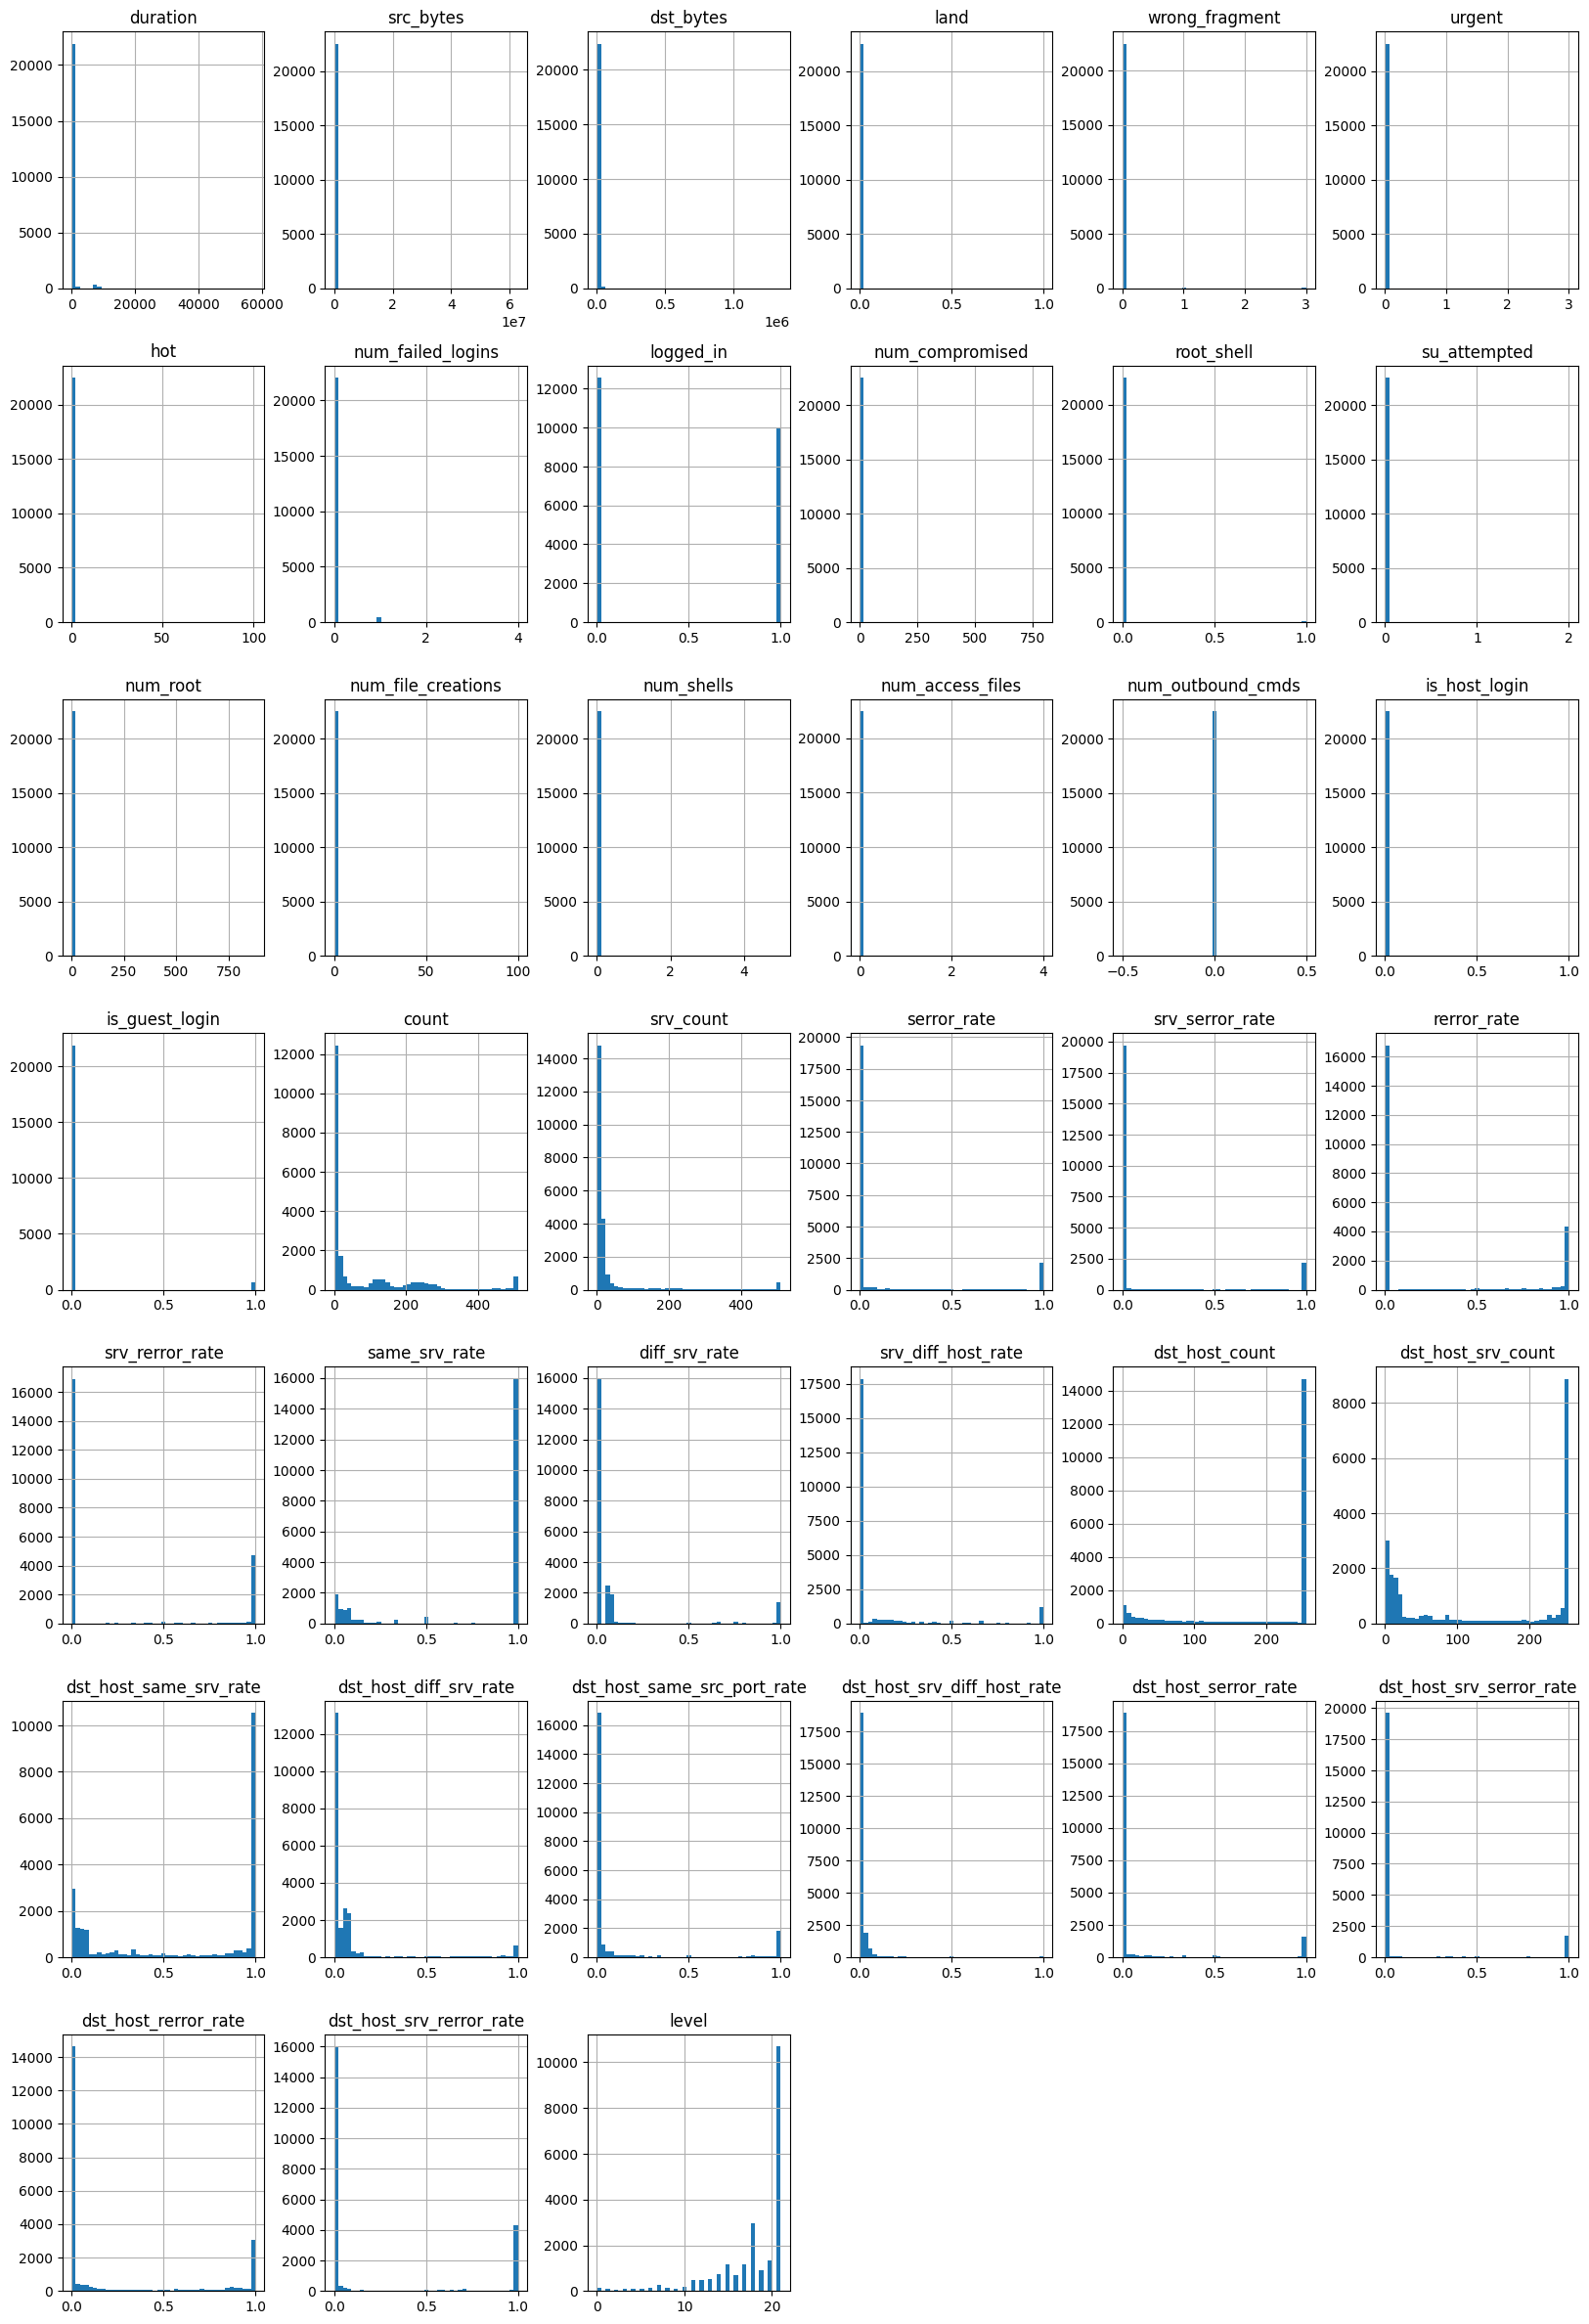

In [ ]:
df.hist(bins=43,figsize=(20,30));

In [ ]:
attack_n = []
for i in df.attack :
  if i == 'normal':
    attack_n.append("normal")
  else:
    attack_n.append("attack")
df['attack'] = attack_n
#Classify if attack or not

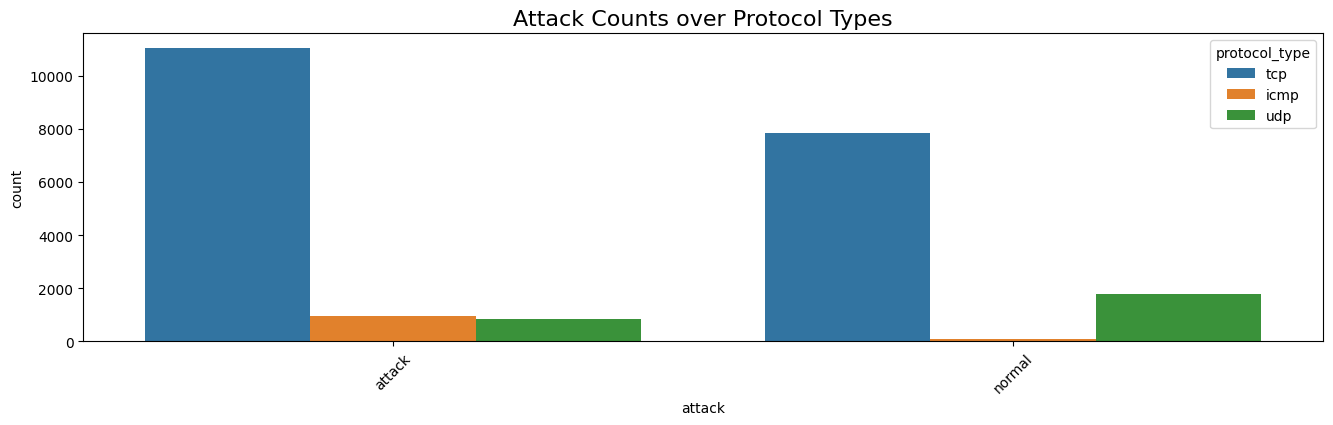

In [ ]:
plt.figure(figsize=(16,4))
sns.countplot(x='attack',data=df,hue='protocol_type')
plt.xticks(rotation=45)
plt.title('Attack Counts over Protocol Types',fontdict={'fontsize':16})
plt.show()

<ipython-input-24-e5bd1a77aa25>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels


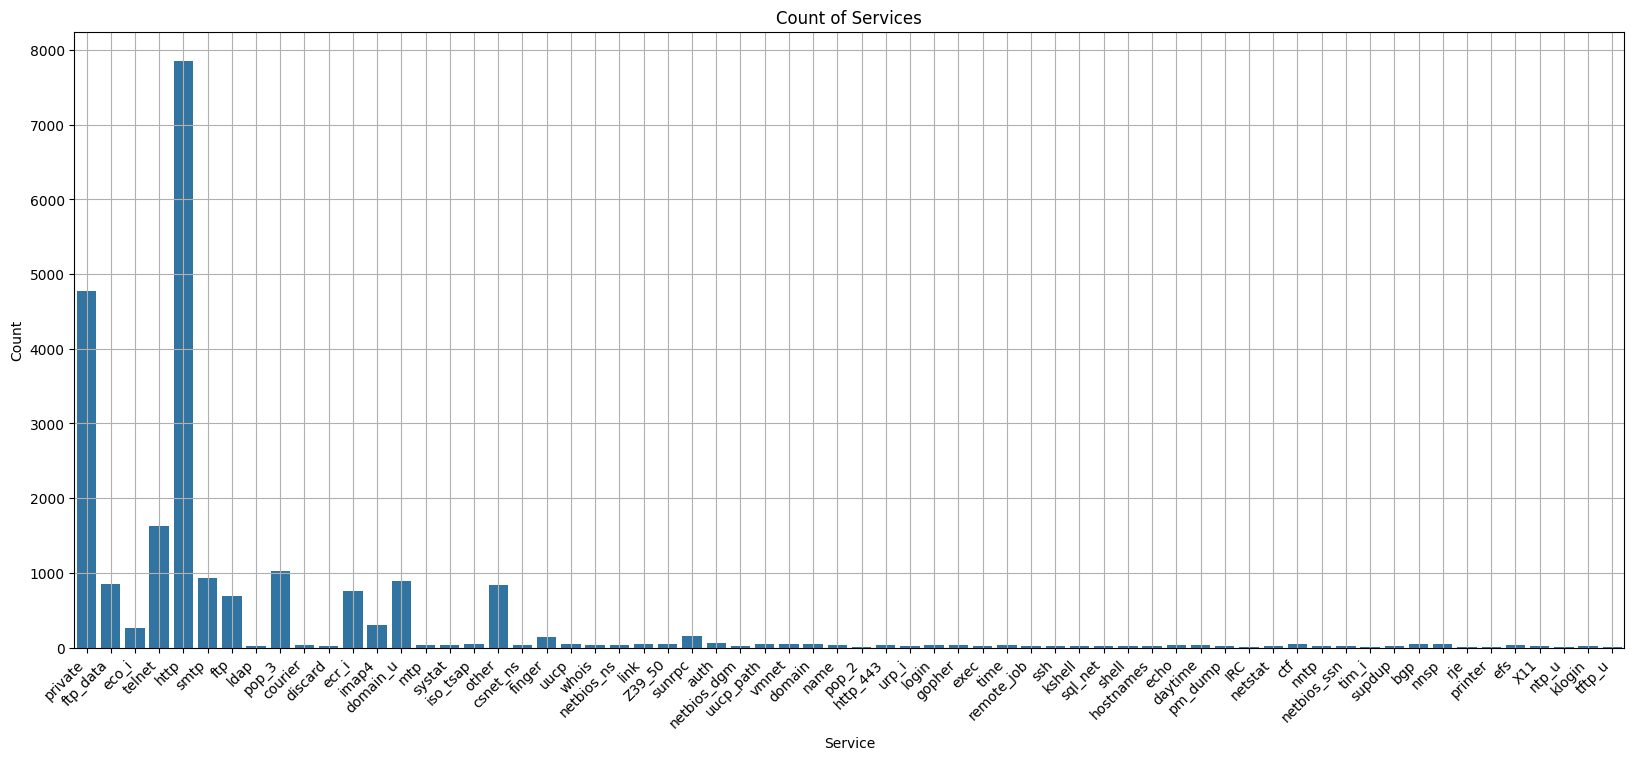

In [ ]:
plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Count of Services')
plt.grid(True)
plt.show()

<ipython-input-25-e4cba8f92b29>:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels


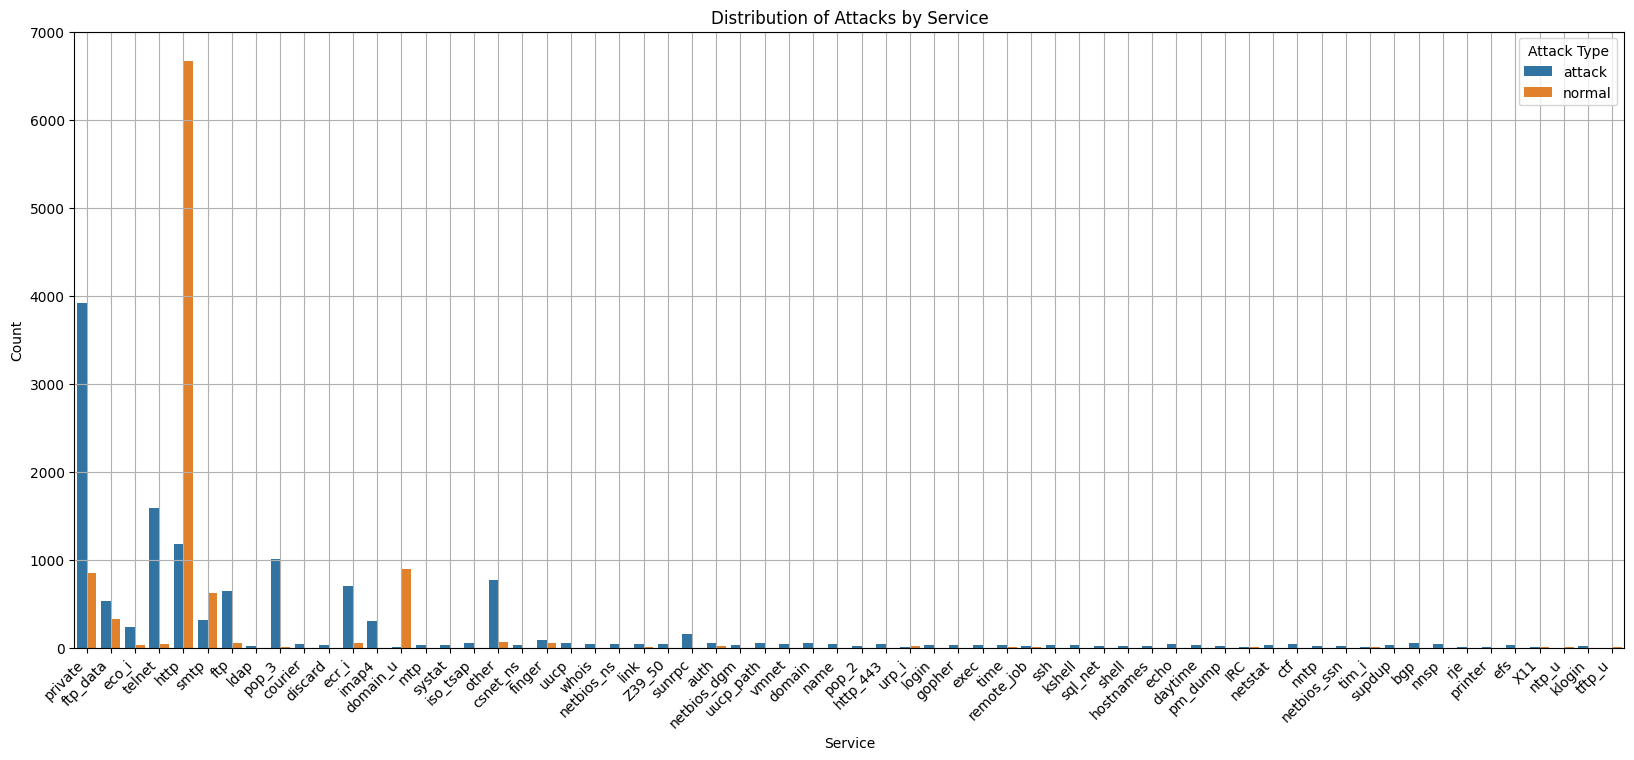

In [ ]:

plt.figure(figsize=(20, 8))  # Adjusted figure size
ax = sns.countplot(x='service', hue='attack', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotated labels
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Distribution of Attacks by Service')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

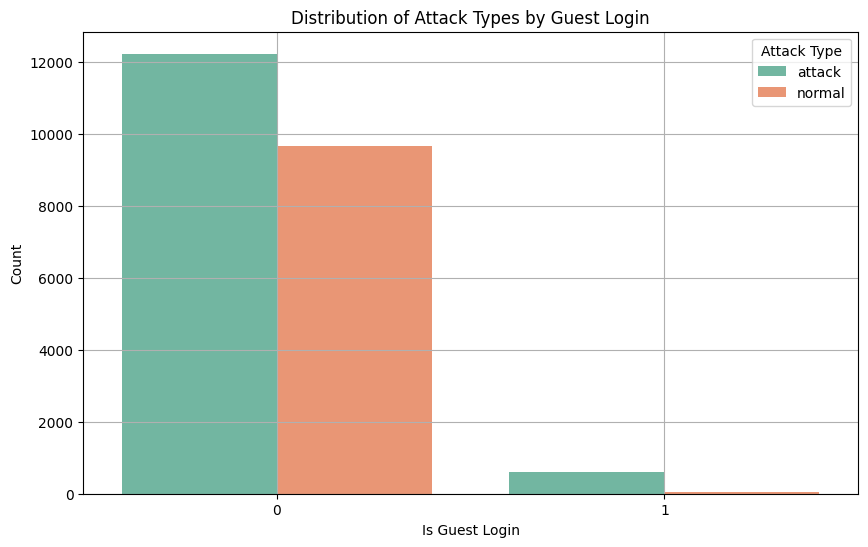

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='is_guest_login', hue='attack', data=df, palette='Set2')
plt.xlabel('Is Guest Login')
plt.ylabel('Count')
plt.title('Distribution of Attack Types by Guest Login')
plt.legend(title='Attack Type')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
le = preprocessing.LabelEncoder()
clm = ['protocol_type', 'service', 'flag', 'attack']
for x in clm:
    df[x] = le.fit_transform(df[x])

In [ ]:


X = df.drop(["attack"], axis=1)
y = df["attack"]

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4,random_state=43)

In [ ]:
train_index = X_train.columns
train_index

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'level'],
      dtype='object')

In [ ]:

mutual_info = mutual_info_classif(X_train, y_train)
mutual_info = pd.Series(mutual_info)
mutual_info.index = train_index
mutual_info.sort_values(ascending=False)

,0
src_bytes,0.535646
dst_bytes,0.482407
service,0.337725
dst_host_srv_count,0.241123
dst_host_same_srv_rate,0.238267
flag,0.236618
dst_host_diff_srv_rate,0.235554
dst_host_rerror_rate,0.211550
dst_host_srv_rerror_rate,0.186018
count,0.185166


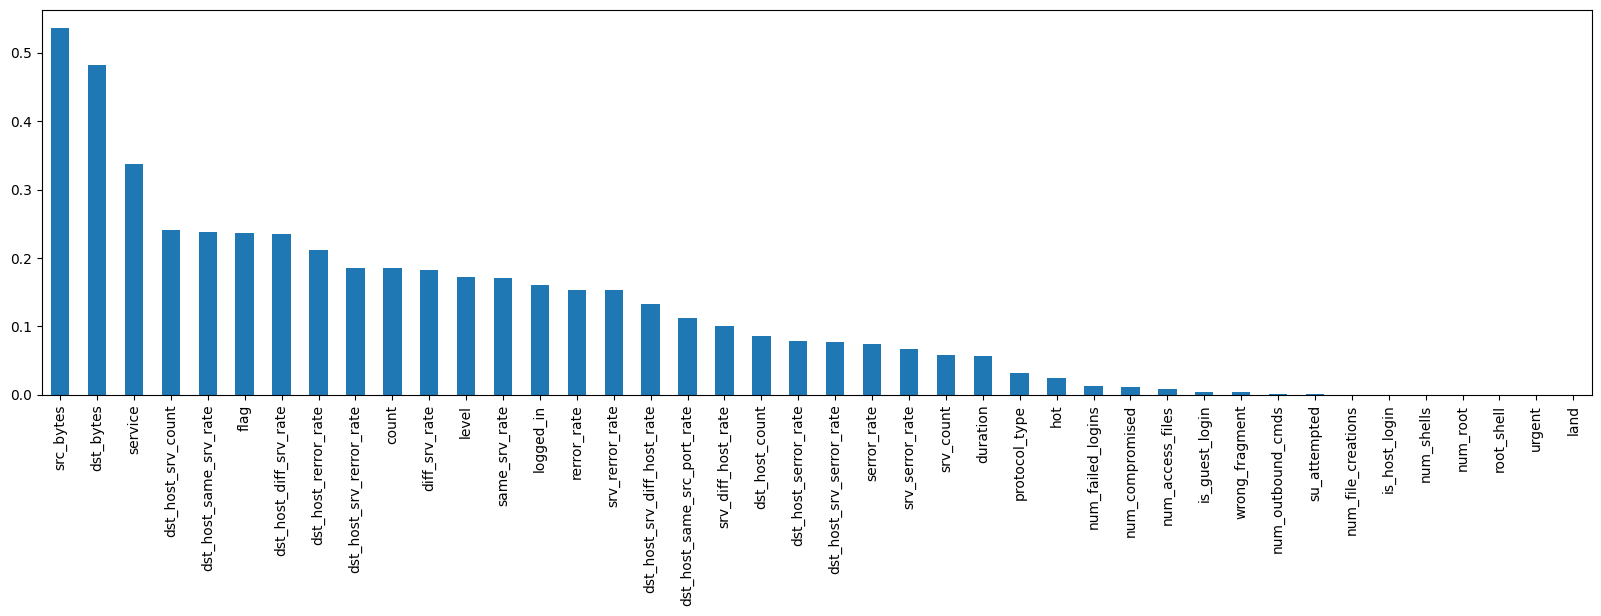

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 5));

In [ ]:
Select_features = SelectKBest(mutual_info_classif, k=30)
Select_features.fit(X_train, y_train)
train_index[Select_features.get_support()]

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'hot', 'num_failed_logins', 'logged_in', 'is_guest_login',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate',
       'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'level'],
      dtype='object')

In [ ]:
columns=['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'wrong_fragment', 'hot', 'logged_in', 'num_compromised',
       'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate']

#We will continue our model with top 15 features, because dataset is big enough

X_train=X_train[columns]
X_test=X_test[columns]

In [ ]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # we use only transform in order to prevent data leakage

In [ ]:
# Initialisation du modèle de régression logistique
Logistic_model = LogisticRegression(random_state=42, max_iter=1000)

# Entraîner le modèle sur l'ensemble d'entraînement
Logistic_model.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = Logistic_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8936571301840763

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      5103
           1       0.91      0.84      0.87      3915

    accuracy                           0.89      9018
   macro avg       0.90      0.89      0.89      9018
weighted avg       0.89      0.89      0.89      9018



In [ ]:

# Initialisation du modèle Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)


dt_model.fit(X_train, y_train)# Entraînement du modèle sur les données d'entraînement


y_pred = dt_model.predict(X_test)# Prédictions sur les données de test


accuracy = accuracy_score(y_test, y_pred) #évaluation des performances
print(f"Accuracy of Decision Tree Model: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#affichage de la matrice de confusion
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy of Decision Tree Model: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5103
           1       0.99      0.98      0.98      3915

    accuracy                           0.99      9018
   macro avg       0.99      0.98      0.99      9018
weighted avg       0.99      0.99      0.99      9018


Confusion Matrix:
[[5054   49]
 [  81 3834]]


In [ ]:

#initialisation du modèle SVM avec un noyau linéaire ou RBF
svm_model = SVC(kernel='rbf', random_state=42)

#entraînement du modèle sur l'ensemble d'entraînement
svm_model.fit(X_train, y_train)

#prédictions sur l'ensemble de test
y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) #évaluation du modèle
print(f"Accuracy of SVM: {accuracy:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy of SVM: 0.93

Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      5103
           1       0.99      0.84      0.91      3915

    accuracy                           0.93      9018
   macro avg       0.94      0.92      0.92      9018
weighted avg       0.93      0.93      0.93      9018



In [ ]:
nb_model = GaussianNB() # Initialiser le modèle naive bayes
nb_model.fit(X_train, y_train) # entraîner le modèle sur les données d'entraînement
y_pred = nb_model.predict(X_test) # prédire les étiquettes sur l'ensemble de test
accuracy = accuracy_score(y_test, y_pred) # calculer la précision
print("Accuracy:", accuracy)


print("\nClassification Report:\n", classification_report(y_test, y_pred)) # classification


Accuracy: 0.8074961188733644

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.68      0.80      5103
           1       0.70      0.98      0.82      3915

    accuracy                           0.81      9018
   macro avg       0.84      0.83      0.81      9018
weighted avg       0.86      0.81      0.81      9018

